In [1]:
from statsmodels.datasets import get_rdataset
fisher = get_rdataset('iris')

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np

#impostiamo un seed per ripetitibilità
np.random.seed(1346)

fisher_training, fisher_test = train_test_split(fisher.data,test_size=0.15)
print("Numero di campioni di training",len(fisher_training))
print("Numero di campioni di test",len(fisher_test))

Numero di campioni di training 127
Numero di campioni di test 23


In [3]:
import pandas as pd
def format_data(data):
    #costruiamo un dataframe vuoto
    df = pd.DataFrame()
    #inserieamo le prime due feature e chiamiamole X e Y
    df['X'] = data['Sepal.Length']
    df['Y'] = data['Sepal.Width']
    #inseriamo una colonna "C" che contenga le classi
    df['C'] = data['Species']
    return df

fisher_training2d, fisher_test2d = format_data(fisher_training),format_data(fisher_test)
fisher_training2d.head()

,X,Y,C
61,5.9,3.0,versicolor
85,6.0,3.4,versicolor
86,6.7,3.1,versicolor
112,6.8,3.0,virginica
126,6.2,2.8,virginica


In [4]:
from sklearn.tree import DecisionTreeClassifier 
#limitiamo la profondità massima dell'albero per poterlo visualizzare in seguito
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(fisher_training2d.drop('C',axis=1),fisher_training2d['C'])

DecisionTreeClassifier(max_depth=3)

In [5]:
dt.score(fisher_test2d.drop('C',axis=1),fisher_test2d['C'])

0.8695652173913043

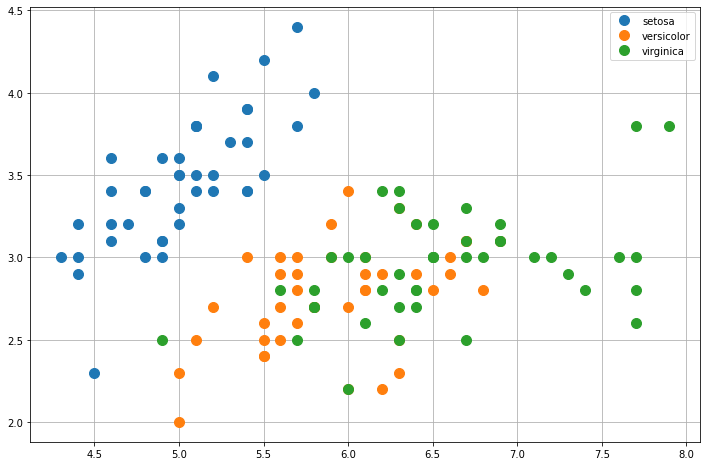

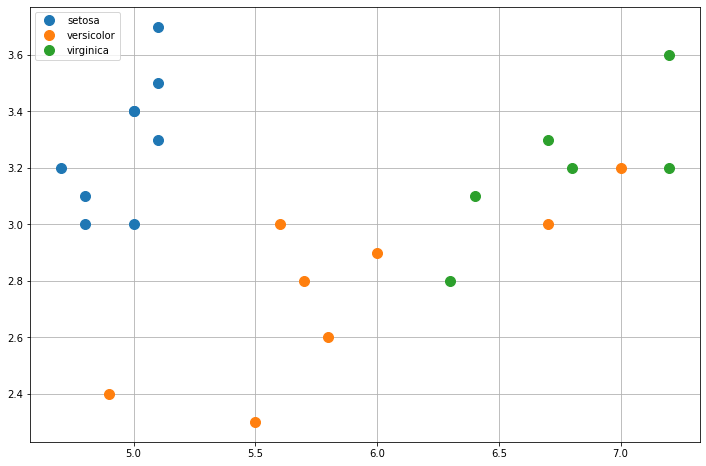

In [6]:
from matplotlib import pyplot as plt

def plot2d(data, marker='o'):
    classes = sorted(data.C.unique())
    for c in classes:
        plt.plot(data[data['C']==c].X.values,
                 data[data['C']==c].Y.values, '.', label=c, marker=marker, markersize=10)

plt.figure(figsize=(12,8))
plot2d(fisher_training2d)
plt.grid()
plt.legend()

plt.figure(figsize=(12,8))
plot2d(fisher_test2d)
plt.grid()
plt.legend()
plt.show()

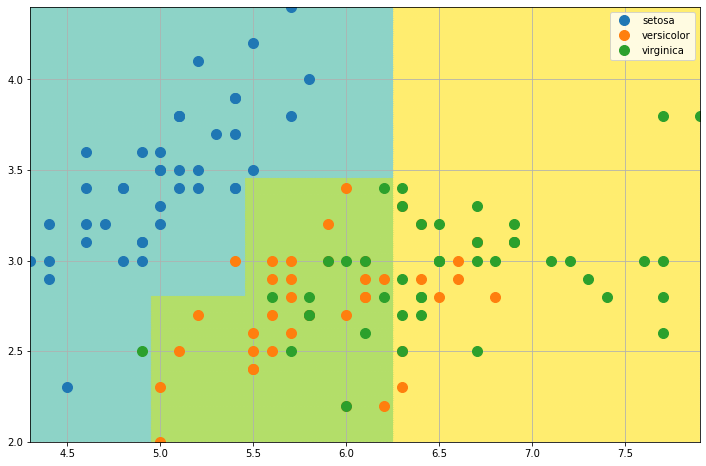

In [7]:
def plot_decision_tree_boundary(data, tree):
    #plottiamo i dati
    plot2d(data)
    #campioniamo 200 punti in maniera uniforme su entrambi gli assi
    X = np.linspace(data.X.min(), data.X.max(),200)
    Y = np.linspace(data.Y.min(), data.Y.max(),200)
    
    #costruiamo una griglia di coppie 2D di punti
    X,Y = np.meshgrid(X,Y)
    
    #classifichiamo tutti i punti
    Z = tree.predict(np.c_[X.ravel(), Y.ravel()]) # c_ concatena gli array lungo la seconda dimensione
    
    #recuperiamo i nomi delle classi e mettiamole in un dizionario
    class_dict = {c:i for i,c in enumerate(tree.classes_)}
    
    #trasformiamo gli id in classi
    Z=np.array(list(map(lambda x: class_dict[x],Z)))
    
    #modifichiamo la shape di Z per farla diventare una griglia   
    Z = np.array(Z).reshape(X.shape)
    
    #utiliziamo pcolormesh per visualizzare le aree
    plt.pcolormesh(X, Y, Z, antialiased=True, cmap='Set3')

plt.figure(figsize=(12,8))
plot_decision_tree_boundary(fisher_training2d,dt)
plt.grid()
plt.legend()
plt.show()

In [8]:
dt = DecisionTreeClassifier()
dt.fit(fisher_training2d.drop('C',axis=1),fisher_training2d['C'])

DecisionTreeClassifier()

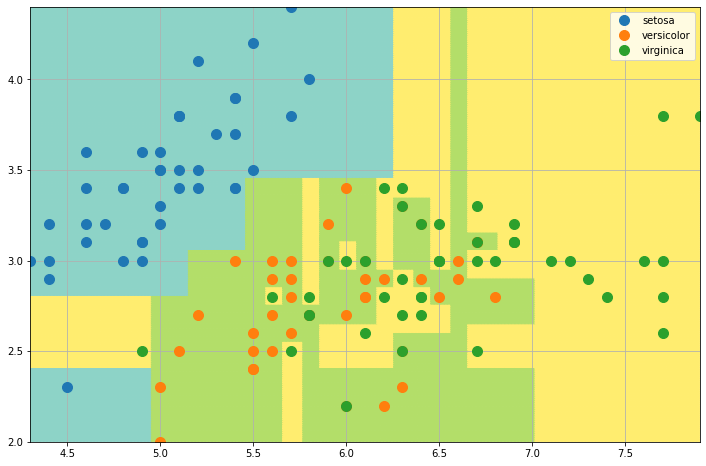

In [9]:
plt.figure(figsize=(12,8))
plot_decision_tree_boundary(fisher_training2d,dt)
plt.grid()
plt.legend()
plt.show()

In [10]:
#limitiamo la profondità massima dell'albero per poterlo visualizzare in seguito
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(fisher_training.drop('Species',axis=1),fisher_training['Species'])

DecisionTreeClassifier(max_depth=3)

In [11]:
dt.score(fisher_test.drop('Species',axis=1), fisher_test['Species'])

0.9565217391304348

In [12]:
from sklearn.ensemble import RandomForestClassifier
#le random forest sono dei metodi stocastici
#e dunque possono dare risultati diversi per run diversi
#impostiamo un seed per ripetitibilità
np.random.seed(1348)
#limitiamo la profondità massima dell'albero per poterlo visualizzare in seguito
df = RandomForestClassifier(max_depth=3, n_estimators=100)
df.fit(fisher_training2d.drop('C',axis=1),fisher_training2d['C'])

RandomForestClassifier(max_depth=3)

In [13]:
print("Accuracy di training del modello: %0.2f" % df.score(fisher_training2d.drop('C',axis=1),fisher_training2d['C']))
print("Accuracy di test del modello: %0.2f" % df.score(fisher_test2d.drop('C',axis=1),fisher_test2d['C']))

Accuracy di training del modello: 0.83
Accuracy di test del modello: 0.91


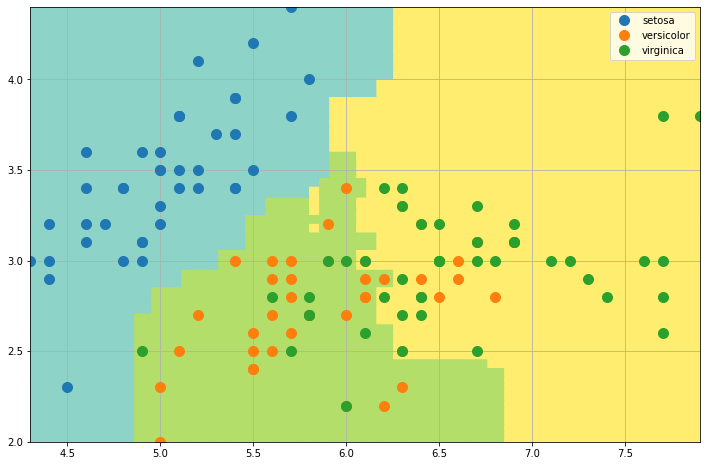

In [14]:
plt.figure(figsize=(12,8))
plot_decision_tree_boundary(fisher_training2d,df)
plt.grid()
plt.legend()
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV
#impostiamo un seed per ripetitibilità
np.random.seed(1348)
#definiamo la griglia di parametri
param_grid = {'max_depth': [3, 10, 15, None], 'n_estimators': [50, 100, 150, 200]}
#definiamo l'oggetto Grid Search
gs = GridSearchCV(RandomForestClassifier(), param_grid, verbose=1, n_jobs=2, cv=5)
#avviamo la ricerca dei parametri ottimali sui nostri dati
gs.fit(fisher_training2d.drop('C',axis=1),fisher_training2d['C'])

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed:   15.1s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_depth': [3, 10, 15, None],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=1)

In [ ]:
gs.best_estimator_

In [16]:
print("Accuracy di training del modello ottimizzato: %0.2f" % gs.score(fisher_training2d.drop('C',axis=1),fisher_training2d['C']))
print("Accuracy di test del modello ottimizzato: %0.2f" % gs.score(fisher_test2d.drop('C',axis=1),fisher_test2d['C']))

Accuracy di training del modello ottimizzato: 0.83
Accuracy di test del modello ottimizzato: 0.91
